<a href="https://www.kaggle.com/code/cedricaubin/data-science-salaries-analytics?scriptVersionId=216191108" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Part I - Exploratory Analytics: Data related job salaries
## by Cedric Aubin


## Introduction
> Introduce the dataset

The salaries dataset we will work with is from [ai-jobs](https://salaries.ai-jobs.net/download/). Ai-jobs collects salary information anonymously from professionals all over the world in the AI/ML and Big Data space and makes it publicly available for anyone to use, share and play around with. The data is being updated regularly with new data coming in, usually on a weekly basis.
The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions.

The dataset contains one table structured as follow:
* **work_year:** The year the salary was paid.
* **experience_level:** The experience level in the job during the year with the following possible values:
 * **EN:** Entry-level / Junior
 * **MI:** Mid-level / Intermediate
 * **SE:** Senior-level / Expert
 * **EX:** Executive-level / Director
* **employment_type:** The type of employement for the role:
 * **PT:** Part-time
 * **FT:** Full-time
 * **CT:** Contract
 * **FL:** Freelance
* **job_title:** The role worked in during the year.
* **salary:** The total gross salary amount paid.
* **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
* **salary_in_usd:** The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
* **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
* **remote_ratio:** The overall amount of work done remotely, possible values are as follows:
 * **0:** No remote work (less than 20%)
 * **50:** Partially remote
 * **100:** Fully remote (more than 80%)
* **company_location:** The country of the employer's main office or contracting branch as an ISO 3166 country code.
* **company_size:** The average number of people that worked for the company during the year:
 * **S:** less than 50 employees (small)
 * **M:** 50 to 250 employees (medium)
 * **L:** more than 250 employees (large) 



<a id="prelim"></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load data from csv file
salaries_df = pd.read_csv('../input/ai-ml-salaries/salaries.csv')
# write the shape of thte dataset
print( "There are {} enteries and {} variables".format(salaries_df.shape[0], salaries_df.shape[1]))
# output random samples 
salaries_df.sample(5)

There are 73148 enteries and 11 variables


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
53304,2024,MI,FT,Data Scientist,88995,USD,88995,AU,0,AU,M
10278,2024,EN,FT,Data Analyst,140000,USD,140000,US,0,US,M
40584,2024,SE,FT,Software Engineer,314400,USD,314400,US,0,US,M
10316,2024,SE,FT,Machine Learning Scientist,188100,USD,188100,US,0,US,M
56314,2024,SE,FT,Data Analyst,85000,USD,85000,US,100,US,M


### What is the structure of your dataset?

> The dataset contains 73148 employees' salaries for data related jobs from 2020 to 2025. 11 variables are used to record the salaries. Most variables are qualitative with both ordered and un ordered factor variables.

### What is/are the main feature(s) of interest in your dataset?

> The primary goal of the data is to provide better guidance in regards to what's being paid globally. We are interested in finding which factors accounts for higher salaries and salary trends within the years.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> We think that the most factor that influence salary is employee experience. Job title,  job type, year of work and company size also affect salary but at a lower extend. But since we are not certain, we will test the correlation of salaries with the other variables too (employee residence and company location).

### Assessment & Cleaning

#### Assessment

In [3]:
# Let's start by having a summary view of our table
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73148 non-null  int64 
 1   experience_level    73148 non-null  object
 2   employment_type     73148 non-null  object
 3   job_title           73148 non-null  object
 4   salary              73148 non-null  int64 
 5   salary_currency     73148 non-null  object
 6   salary_in_usd       73148 non-null  int64 
 7   employee_residence  73148 non-null  object
 8   remote_ratio        73148 non-null  int64 
 9   company_location    73148 non-null  object
 10  company_size        73148 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


> We notice there is no null value in our table and columns' name contain no space. Even though we can work with the data types as they are, we will do some modifications: change experience level, company size and remote ratio to ordered-category and employment type to unordered category. 

In [4]:
# Verify if there are duplicates and how many they are.
# False = unique entries 
# True = duplicate entries
salaries_df.duplicated().value_counts()

True     39124
False    34024
dtype: int64

In [5]:
# Display the number of entries for each year for both the whole dataset and the duplicates

duplicates = salaries_df[salaries_df.duplicated()]
print("Salaries for each year: \n{}".format(salaries_df.work_year.value_counts()))
print("\nDuplicated salaries for each year: \n{}".format(duplicates.work_year.value_counts()))

Salaries for each year: 
2024    62228
2023     8522
2022     1659
2025      446
2021      218
2020       75
Name: work_year, dtype: int64

Duplicated salaries for each year: 
2024    34549
2023     3986
2022      547
2025       38
2021        4
Name: work_year, dtype: int64


> Regarding the nature of variables in our table, it is logically possible to have two or more people having the same entries. So we can't confirm if they are duplicates or distinc entries. In the absence of extra information we will continue without deleting these "duplicates".

In [6]:
# Display summary statistics for numeric columns
salaries_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73148.000000,7.314800e+04,73148.000000,73148.000000
mean,2023.831192,1.625534e+05,158013.748619,21.582955
std,0.477551,1.925761e+05,72501.304728,41.023051
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.069575e+05,106890.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


#### Cleaning

In [7]:
# Copy the dataframe before working on
salaries_clean = salaries_df.copy()
salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73148 non-null  int64 
 1   experience_level    73148 non-null  object
 2   employment_type     73148 non-null  object
 3   job_title           73148 non-null  object
 4   salary              73148 non-null  int64 
 5   salary_currency     73148 non-null  object
 6   salary_in_usd       73148 non-null  int64 
 7   employee_residence  73148 non-null  object
 8   remote_ratio        73148 non-null  int64 
 9   company_location    73148 non-null  object
 10  company_size        73148 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


In [8]:
# Function to convert datatype to categorical (ordinal and nominal)
def to_category(var: str, ordered: bool, df: pd.DataFrame, categories: list):
    """ Function that converts type to category
            parameters:
            var: string, the name of the column to convert type
            ordered: boolean, If false, then the categorical is treated as unordered
            df: dataframe, 
            categories: the ordered list of the category
            
            return: the converted series 
    
    """
    # Note: based on the pandas version, you need to code differently
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        classes = pd.api.types.CategoricalDtype(ordered = ordered, categories = categories)
        df[var] = df[var].astype(classes)
    else: # pre-v0.21
        df[var] = df[var].astype('category', ordered = ordered,categories = categories)
    return df[var]


In [9]:
# Create category type for different variables
experience = ['EN', 'MI', 'SE', 'EX']
company = ['S', 'M', 'L']
employment_type = ['PT', 'FT', 'CT', 'FL']
remote = [0, 50, 100]
year = [2020, 2021, 2022, 2023, 2024, 2025]

salaries_clean['experience_level'] = to_category('experience_level', True, salaries_clean, experience)
salaries_clean['company_size'] = to_category('company_size', True, salaries_clean, company)
salaries_clean['employment_type'] = to_category('employment_type', False, salaries_clean, employment_type)
salaries_clean['remote_ratio'] = to_category('remote_ratio', True, salaries_clean, remote)
salaries_clean['work_year'] = to_category('work_year', True, salaries_clean, year)

# Test types were converted. Dtype should be category
salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           73148 non-null  category
 1   experience_level    73148 non-null  category
 2   employment_type     73148 non-null  category
 3   job_title           73148 non-null  object  
 4   salary              73148 non-null  int64   
 5   salary_currency     73148 non-null  object  
 6   salary_in_usd       73148 non-null  int64   
 7   employee_residence  73148 non-null  object  
 8   remote_ratio        73148 non-null  category
 9   company_location    73148 non-null  object  
 10  company_size        73148 non-null  category
dtypes: category(5), int64(2), object(4)
memory usage: 3.7+ MB


In [10]:
# Contary to the previous version of this notebook, we will not delete duplicates
# aries_clean.drop_duplicates(inplace= True, ignore_index=True)

In [11]:
# Test duplicates were deleted. result should be 0
# salaries_clean.duplicated().sum()

In [12]:
salaries_clean.shape

(73148, 11)

In [13]:
# Save the cleaned data in a csv file
salaries_clean.to_csv('salaries_master.csv', index=False)

We are done with the assessment and cleaning. Next, we will start ploting our visualizations

## Univariate Exploration


### Question: What is the distribution of salaries?

We will start with our main variabble of interest; salary. For uniformity in currency, we will exclusively work only with salaries in US dollar.

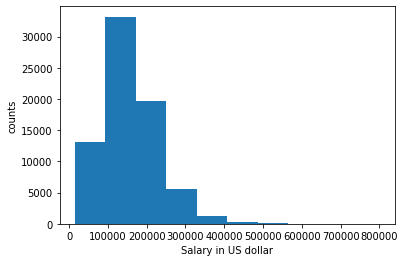

In [14]:
plt.hist(data=salaries_clean, x='salary_in_usd')
plt.xlabel('Salary in US dollar')
plt.ylabel('counts')
plt.show()

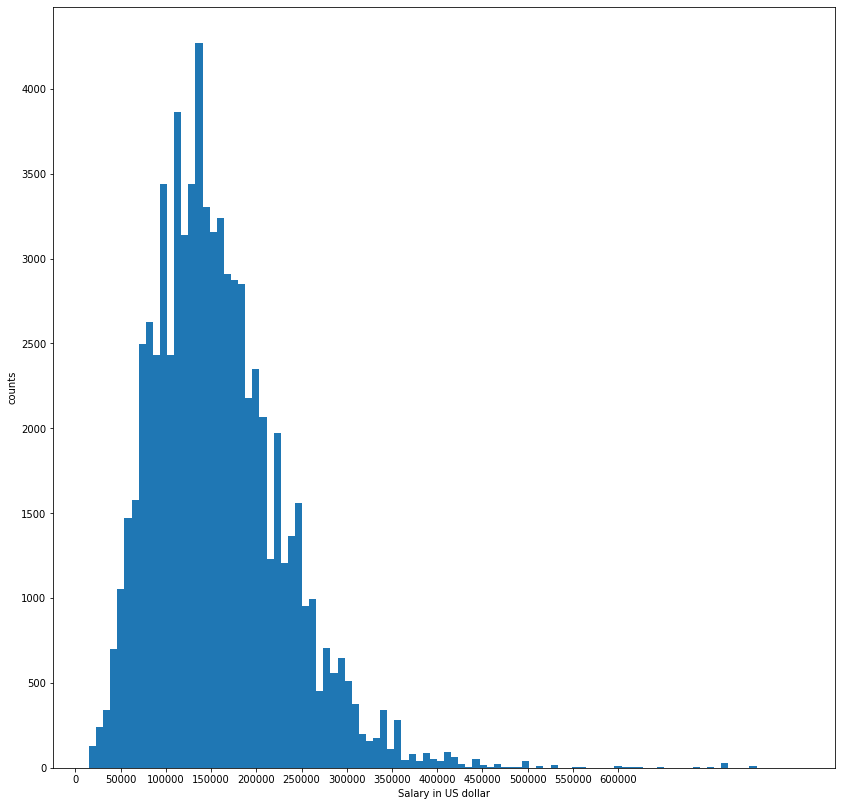

In [15]:
plt.figure(figsize = [14, 14])
xticks = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000]
plt.hist(data=salaries_clean, x='salary_in_usd', bins = 100)
plt.xticks(xticks)
plt.xlabel('Salary in US dollar')
plt.ylabel('counts');

**Observation:** As we could predict, salary has a right-skewed distribution. When the number of bins are increased, the distribution is made up of peaks with the highest around 150000 dollars and steep jumps. The discontinuity above 450000 dollars on the graph emphasizes the gap or difference between top salaries and others in the data science industry.


Let's have a closer look at these top salaries which create discontinuity in the distribution.

In [16]:
# collect rows with salaries on the right of the graph
discontinous_salaries = salaries_clean[salaries_clean.salary_in_usd > 450000]
print(discontinous_salaries.shape)
discontinous_salaries.sort_values(by='salary_in_usd', ascending=False)

(202, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
59418,2024,MI,FT,AI Architect,800000,USD,800000,CA,100,CA,M
60261,2024,EN,FT,Data Analyst,774000,USD,774000,MX,0,MX,M
62422,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
47314,2024,SE,FT,Data Scientist,750000,USD,750000,US,0,US,M
61060,2024,SE,FT,Analytics Engineer,750000,USD,750000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
8096,2024,SE,FT,AI Developer,458000,USD,458000,US,0,US,M
21117,2024,SE,FT,Engineer,455200,USD,455200,US,0,US,M
12327,2024,SE,FT,Platform Engineer,454300,USD,454300,US,0,US,M
11387,2024,SE,FT,Machine Learning Engineer,451000,USD,451000,US,0,US,M


The entries are pretty similar. These data should be correct.

### Question: What is the distribution of employee's experience, type of employment and company size?

All two (2) variables are qualitative, ordinal values. We will use bar chart to visualize their distribution.  

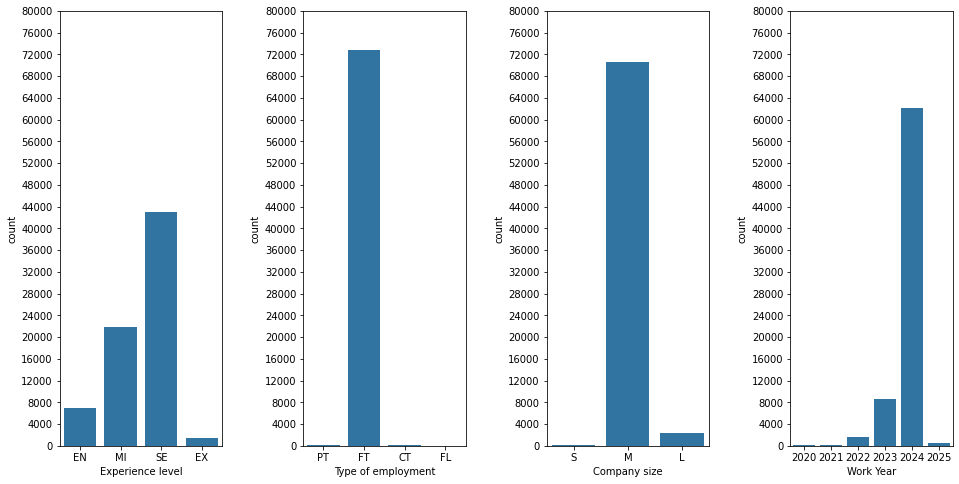

In [17]:
# let's plot all three together to get an idea of each categorical variable's distribution.

fig, ax = plt.subplots(ncols=4, figsize = [16,8])
yticks = [0, 4000, 8000, 12000, 16000, 20000, 24000, 28000, 32000, 36000, 40000, 44000, 48000, 52000, 56000, 60000, 64000, 68000, 72000, 76000, 80000]
default_color = sb.color_palette()[0]
sb.countplot(data = salaries_clean, x = 'experience_level', color = default_color, ax = ax[0]).set(xlabel='Experience level')
ax[0].set_yticks(yticks)
sb.countplot(data = salaries_clean, x = 'employment_type', color = default_color, ax = ax[1]).set(xlabel='Type of employment')
ax[1].set_yticks(yticks)
sb.countplot(data = salaries_clean, x = 'company_size', color = default_color, ax = ax[2]).set(xlabel='Company size')
ax[2].set_yticks(yticks)
sb.countplot(data = salaries_clean, x = 'work_year', color = default_color, ax = ax[3]).set(xlabel='Work Year')
ax[3].set_yticks(yticks)
plt.subplots_adjust(wspace=0.5)
plt.show()

**Observation:** The dataset contains mostly employees with senior-level/expert experience level. Almost all the employees have a full time job. Most employees work in a medium-size company. The majority of the salaries entries are 2024.

### Question: What is the distribution of Job title?

Finally, let's look at the distribution of job title over our dataset.

In [18]:
# Function to return an ordered sub-dataframe 

def ordered_subdataframe(parent_df: pd.DataFrame, column_name: str, size: int, largest= True) -> pd.DataFrame:
    """ Function returns an ordered sub dataframe from the dataframe passed. 
    
        Params: 
            parent_df: the dataframe from which the sub-dataframe will be created
            column_name: the name of the column on which the ordering will be made
            largest: if true, the sub-dataframe will contain the largest occurrent values. If false it will contain the smallest
            size: the number of enteries the sub-dataframe should contain
            
        return:
            a sub-dataframe
    """
    
    if(largest) :
        z = parent_df[column_name].value_counts().nlargest(size) 
    else :
        z =parent_df[column_name].value_counts().nsmallest(size)
    sub_dataframe = parent_df[parent_df[column_name].apply(lambda x: x in z.index)] 
    
    return sub_dataframe

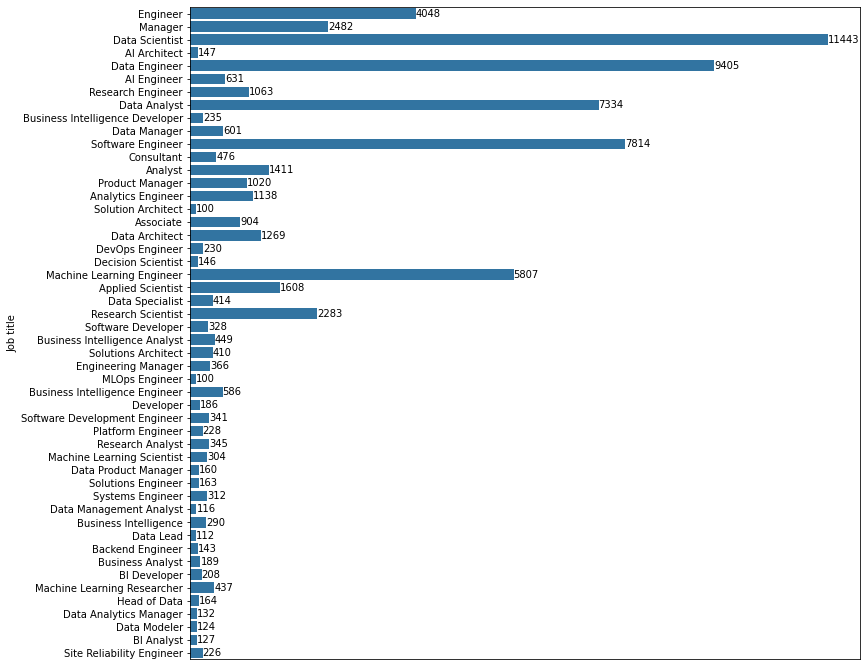

In [19]:
# Due to the high number of enteries, let's plot only the first 50 most occuring job titles

plt.figure(figsize=[12,12])
first_50jobs = ordered_subdataframe(salaries_clean, "job_title", 50)
ax_job = sb.countplot(data=first_50jobs,color=default_color, y='job_title')
ax_job.axes.get_xaxis().set_visible(False)
ax_job.bar_label(ax_job.containers[0])
plt.ylabel('Job title')
plt.show()

**Observation:** The top five roles in descending order are:
1. Data Scientist - 11 443
2. Data Engineer - 9 405
3. Software Engineer - 7 814
4. Data Analyst - 7 334
5. Machine Learning Engineer - 5 807

Before moving to the next section let's have a look on the distribution of the other variables (company location, employee residence and remote ration)

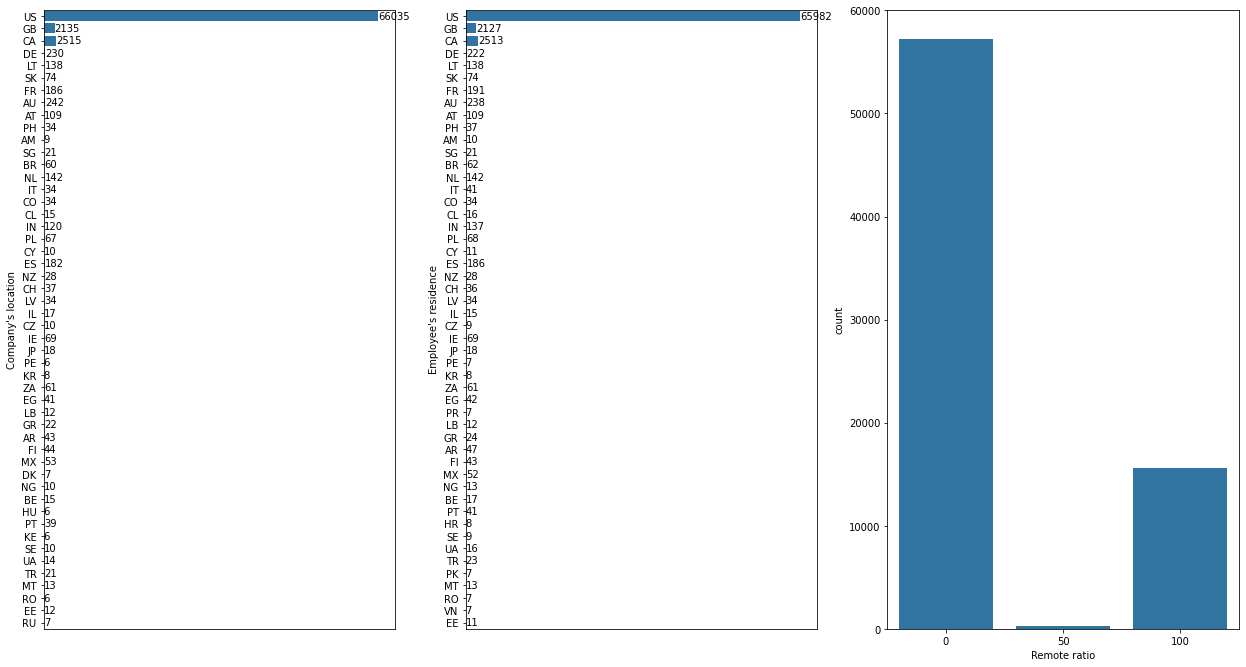

In [20]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(ncols=3, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = ordered_subdataframe(salaries_clean, "company_location", 50), y = 'company_location', color = default_color, ax = ax[0]).set(ylabel="Company's location")
ax[0].axes.get_xaxis().set_visible(False)
ax[0].bar_label(ax[0].containers[0])
sb.countplot(data = ordered_subdataframe(salaries_clean, "employee_residence", 50), y = 'employee_residence', color = default_color, ax = ax[1]).set(
    ylabel="Employee's residence")
ax[1].axes.get_xaxis().set_visible(False)
ax[1].bar_label(ax[1].containers[0])
sb.countplot(data = salaries_clean, x = 'remote_ratio', color = default_color, ax = ax[2]).set(xlabel='Remote ratio')
plt.subplots_adjust(right=2.2, top=1.2)
plt.show()

**Observation:** Companies and employees have the same top five countries: USA, Great Britain, Canada, spain and Germany. Most of the jobs are on-site

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The salary variable has a right-skewed distribution. Salaries concentrate on the low end of the graph as there are more jobs with low wages than higher wages. After increasing the number of bins, the distribution is made up of peaks with the highest around 100000 dollars and steep jumps. The discontinuity above 350000 dollars on the graph emphasizes the gap or difference between top salaries and others in the data science industry. We were concerned about discontinuous points on the graph, but after a deeper look, we concluded that they were correct.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> All features under investigation had usual distributions.  We changed the data type of some features for data quality reason and make sure only desired operations can be performed on the data. We changed experience level, company size and remote ratio to ordered-category variables and employment type to an unordered category variable.

## Bivariate Exploration

In this section, we investigate relationships between pairs of variables we used in the previous section.

### Question: What is the correlation between salary and categorical variables?
The categorical variables here are variables with a very limited number of possible values they can take. These variables are:
experience_level, company_size, employment_type, remote_ratio.

In [21]:
# List of categorical variable
lim_categoric_vars = ['work_year', 'experience_level', 'company_size', 'employment_type', 'remote_ratio']
categoric_vars = ['company_location', 'employee_residence', 'job_title']

In [22]:
def boxgrid(x, y, **kwargs):
    """ Creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color)

<Figure size 720x720 with 0 Axes>

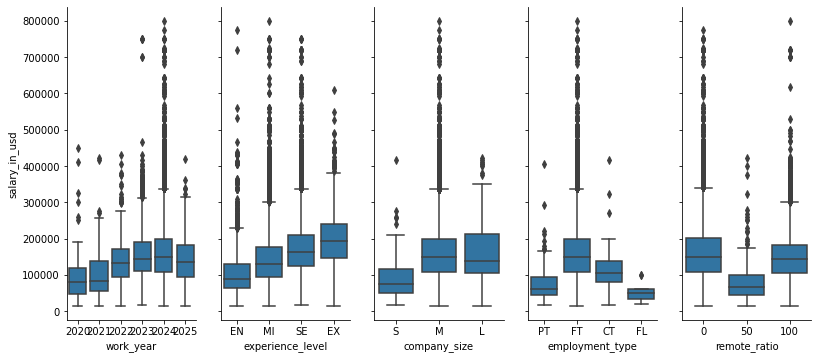

In [23]:
# plot matrix of salary in US dollar against categorical features.
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = salaries_clean, y_vars = ['salary_in_usd'], x_vars = lim_categoric_vars, aspect = 1)
g.map(boxgrid)
g.fig.set_size_inches(8,6)
plt.subplots_adjust(right=1.35)
plt.show();

**Observation:** Salaries have globally increasing through years. As expected, salaries increases with an increase in experience. Medium companies turn to pay higher average wages than any other company. Complete remote and onsite jobs turn to have higher wages than patial remote jobs. Among the three categorical variables, experience level has the strongest correlation with salary.

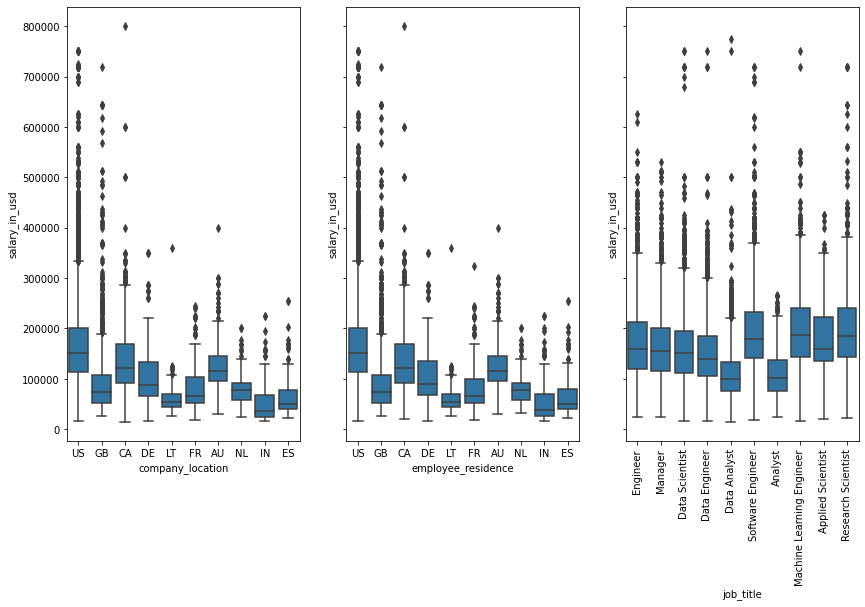

In [24]:
fig, ax = plt.subplots(ncols=3, figsize = [8,8], sharey=True)
count = 0
# loop through qualittive values with too many values to select top 10 and plot a box plot
for var in categoric_vars:
    z = salaries_clean[var].value_counts().head(10)
    #print(salaries_clean[salaries_clean[var].apply(lambda x: x in z.index)])
    sb.boxplot(data = salaries_clean[salaries_clean[var].apply(lambda x: x in z.index)], color = default_color,
               x = var, y = "salary_in_usd", ax = ax[count])
    count+= 1

ax[count-1].tick_params(axis='x', rotation=90)
plt.subplots_adjust(right=1.5)

**Observation:** Companies in the united states of America (USA) offer the highest wages. Employees living in USA are better paid than those in any other country. The correlation between the job role and the salary is weak.

### Question: What are the relationships between categorical variables?
It will be cumbersome to plot the relationships between all the 8 variables. I will choose relationships we beleive important for our initial question; which factor greatly influence the salary of a worker and the trend with the years.

From the above relations with salary, experience level, company location, work year have a faily strong relationship with salary.

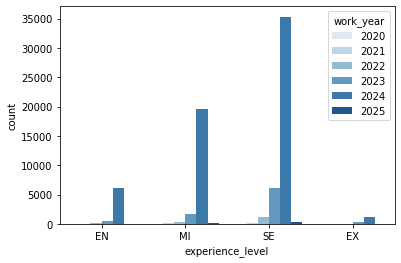

In [25]:
# since there's only three subplots to create, using the full data should be fine.
# plt.figure(figsize = [6,6])
# work year vs experience level
sb.countplot(data = salaries_clean, x = 'experience_level', hue = 'work_year', palette = 'Blues')
plt.show()

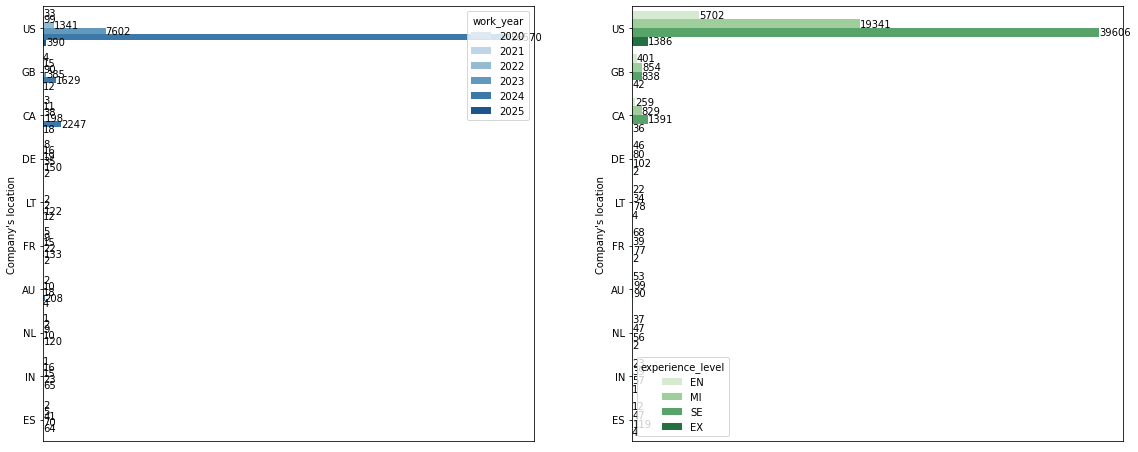

In [26]:
# We will consider the top 10 because above the number companies are too small
company_10 = ordered_subdataframe(salaries_clean, "company_location", 10)
fig, ax = plt.subplots(ncols=2, figsize = [8,8])

# subplot 1: company location vs work year
sb.countplot(data = company_10, y = 'company_location', hue = 'work_year', palette = 'Blues',
             ax = ax[0]).set(ylabel="Company's location")
ax[0].axes.get_xaxis().set_visible(False)
for x in range(len(ax[0].containers)):
    ax[0].bar_label(ax[0].containers[x])

# subplot 2: company location vs experience level
sb.countplot(data = company_10, y = 'company_location', hue = 'experience_level', palette = 'Greens',
             ax = ax[1]).set(ylabel="Company's location")
ax[1].axes.get_xaxis().set_visible(False)

for x in range(len(ax[1].containers)):
    ax[1].bar_label(ax[1].containers[x])
    
plt.subplots_adjust(right=2)


plt.show()

**Observation:** There is an increase in the experience level over years with a boom on senio-level/expert. Globally, there is an increase in the number of companies in every country over years with a peak in US. Companies employ mostly senior-level/expert and mid-level/intermediate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected, there is a strong correlation between salary and the experience level of the employee. The box plot of salary against the experience level looks like linear relationship.
It was interestly surprising to see that medium companies turn to pay better salaries than large companies

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The company's location have insignificant correlation with the expeience level. So no further exploration. 
A positive corrolation between experience level and work year. The experience level that seems to have much influence on salary turns to be influence by the work year. In the section below we will have a deeper look on the relation between this three variables.

## Multivariate Exploration

> Salary, experience level and work year have an interesting relationship that we want to explore further.

### Question: What is the relationship between salary, experience and work year?

Let's look at how Salary, experience and work year are related.

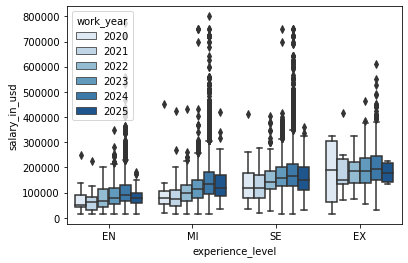

In [27]:
# plot matrix of salary in US dollar against categorical features.
sb.boxplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues')
plt.show();

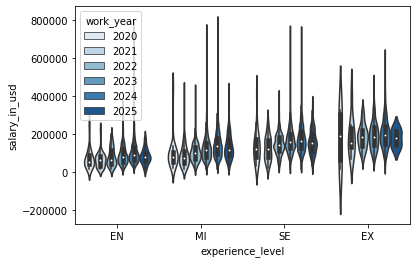

In [28]:
# plot matrix of salary in US dollar against categorical features.
sb.violinplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues')
plt.show();

**Observation:** From the box plot it is difficult to clearly see the changes between salary and experience level over year, especially for 2020 and 2021. With the propability density on the violin plot, we notice that for each experience level, the probability density increases over years. This means there an increase in salaries at each experience level over years.

Let's consider only the top 10 jobs which make more than 70% of our cleaned data. This will held reduce the noice on the plots.

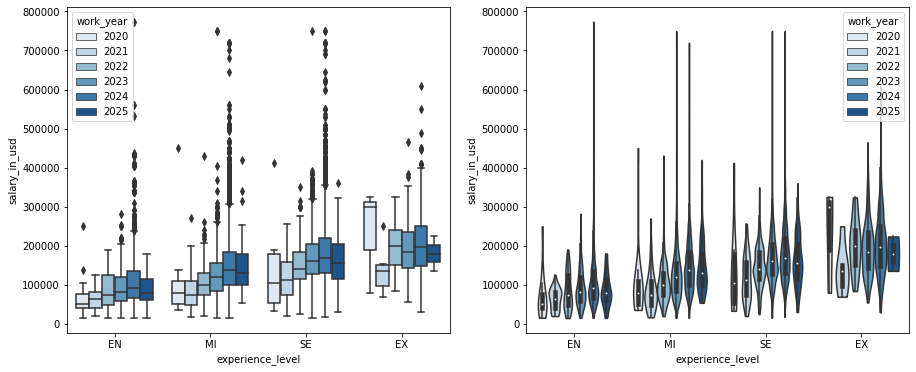

In [29]:
job_10 = ordered_subdataframe(salaries_clean, "job_title", 10)

fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
sb.boxplot(data = job_10, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[0])
sb.violinplot(data = job_10, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[1], cut=0)
plt.subplots_adjust(right=1.1)
plt.show();

Outliners have reduce and we have a better perception on changes over years. For the top job titles in the data set, Executive-level / Director exist only for 2022. 

Let's have a look on the Executive-level / Director jobs in the top 10 job titles

In [30]:
Ex_exp = job_10[job_10['experience_level'].str.contains('EX')]
Ex_exp.job_title.value_counts()

Data Engineer                365
Data Scientist               205
Engineer                     172
Software Engineer             58
Data Analyst                  52
Machine Learning Engineer     48
Manager                       44
Analyst                       32
Research Scientist             3
Name: job_title, dtype: int64

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Among all the features only experience level and work year turn to have a pretty strong relationship with salaries. When we looked at the correlation bewteen the experience level and the work year, we found that the count of each experience level value increases over year with a boom in 2022 for senior-level that continues to 2023.

### Were there any interesting or surprising interactions between features?

> Regarding the strong correlation between work year and experience level, and experience level with salary, we thought when placing the three features on a single plot we will have an easy-to-read strong relationship.

## Conclusions
> We found that among our features, experience has the strongest positive relationship with salary. Experience itself is influence by the work year. When the three features are plotted on a single graph, it is difficult to percieve the relationship. Maybe with a larger dataset the 


# Part II - Communicate Findings: Effect of experience level on salary over years

## Investigation Overview


In this investigation, we wanted to look at the factors that affect the salary over year in the data science industry. The main focus was on experience level and work year.


## Dataset Overview

The salaries dataset we will work with is from [ai-jobs](https://salaries.ai-jobs.net/download/). Ai-jobs collects salary information anonymously from professionals all over the world in the AI/ML and Big Data space and makes it publicly available for anyone to use, share and play around with. The data is being updated regularly with new data coming in, usually on a weekly basis.
The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions.

In [31]:
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

## Distribution of salaries

Salary has a right-skewed distribution. The distribution is made up of peaks with the highest around 100000 dollars and steep jumps. The discontinuity above 285000 dollars on the graph emphasizes the gap or difference between top salaries and others in the data science industry.

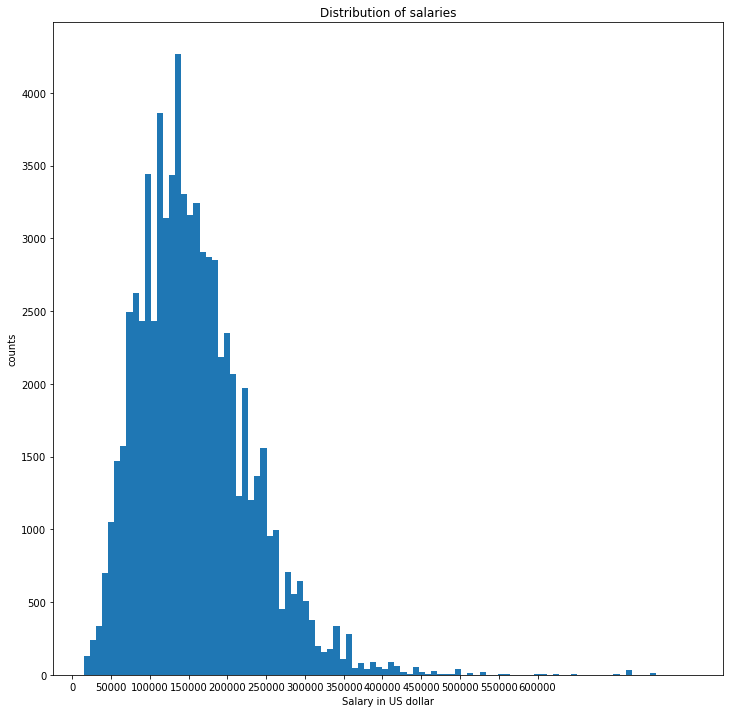

In [32]:
plt.figure(figsize = [12, 12])
xticks = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000]
plt.hist(data=salaries_clean, x='salary_in_usd', bins = 100)
plt.xticks(xticks)
plt.title('Distribution of salaries')
plt.xlabel('Salary in US dollar')
plt.ylabel('counts');

## Salary vs Experience level

Plotting salary against experience level produces a strong linear relationship. As experience level increases from the lower of entery level to the highest at Executive-level/Director the salary increases too even though there are outliners who don't follow the trend.

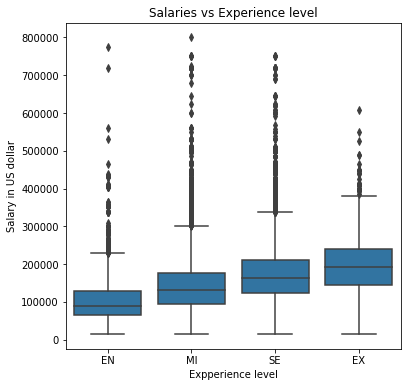

In [33]:
blue_color = sb.color_palette()[0]
plt.figure(figsize = [6,6])
sb.boxplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', color=blue_color)
plt.title('Salaries vs Experience level')
plt.ylabel('Salary in US dollar')
plt.xlabel('Expperience level');
plt.show();

## Salary vs Work year

Weaker than the relationship between salary and experience level, salary also has a positive linear relation with work year. Globally salaries increases with years though not at the same rate.

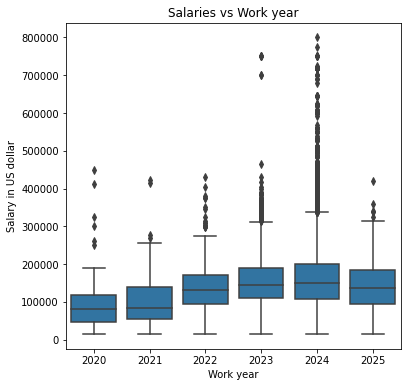

In [34]:
plt.figure(figsize = [6,6])
sb.boxplot(data = salaries_clean, y = 'salary_in_usd', x = 'work_year', color=blue_color)
plt.title('Salaries vs Work year')
plt.ylabel('Salary in US dollar')
plt.xlabel('Work year');
plt.show();

## Salary by experience level and work year

From the box plot it is difficult to clearly see the changes between salary and experience level over year, especially for 2020 and 2021. With the propability density on the violin plot, we notice that for each experience level, the probability density increases over years.

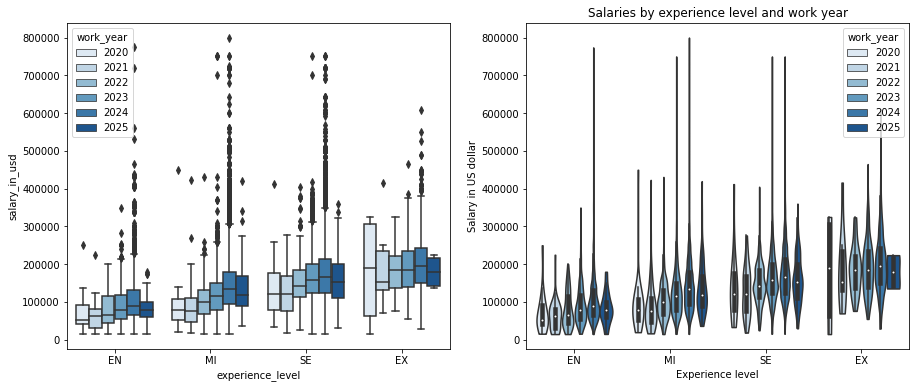

In [35]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
sb.boxplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[0])
sb.violinplot(data = salaries_clean, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[1], cut=0)
plt.title('Salaries by experience level and work year')
plt.ylabel('Salary in US dollar')
plt.xlabel('Experience level');
plt.subplots_adjust(right=1.1)
plt.show();

## Salary by experience level and work year for the top 10 job titles
When we consider only the top 10 job titles which make 78.31% of our dataset, we notice that only 2022 have Executive-level / Director rows. With the probability density and the position of the median on the violin plot of the top 10 job titles we observe an increase in the salary as we move lower experience level to the higher experience level over years.

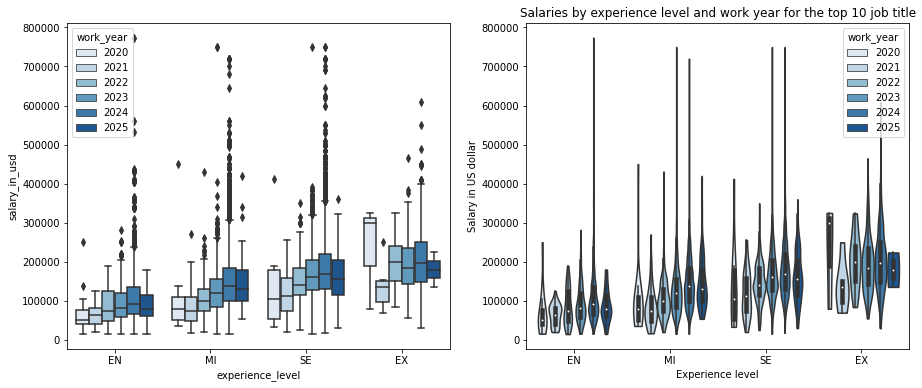

In [36]:
z = salaries_clean['job_title'].value_counts().head(10)
job_10 = salaries_clean[salaries_clean['job_title'].apply(lambda x: x in z.index)]


fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
sb.boxplot(data = job_10, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[0])
sb.violinplot(data = job_10, y = 'salary_in_usd', x = 'experience_level', hue='work_year', palette='Blues', ax=ax[1], cut=0)
plt.title('Salaries by experience level and work year for the top 10 job title')
plt.ylabel('Salary in US dollar')
plt.xlabel('Experience level');
plt.subplots_adjust(right=1.1)
plt.show();